## Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots

## Read-in Data

In [2]:
Feeding_America = pd.read_csv("C:/Users/Ivette/OneDrive/New folder/DSO 110 Final Project/Feeding_America_Food_Insecurity_2018.csv")

# Head()
### Best way to always call your datasets to insure it's properly loaded up

In [3]:
Feeding_America.head()

,OBJECTID_1,FIPS,STATE_FIPS,CNTY_FIPS,NAME,STATE_NAME,POPULATION,State,County__State,Food_Insecurity_Rate_2018,...,Pct__FI_Btwn_Thresholds,Pct__FI___High_Threshold,ChildFoodInsecurityRate_2018,Food_Insecure_Children_2018,FoodInsecureChildrenHH_1_2018,FoodInsecureChildrenHH_2_2018,Cost_Per_Meal_2018,W_AnnFoodBudgetShortfall_2018,Shape__Area,Shape__Length
0,1,1001.0,1,1,Autauga,Alabama,56903,AL,"Autauga County, Alabama",0.156,...,0.132,0.405,0.214,2870.0,0.81,0.19,3.33,4857000.0,1.565568e+09,213533.7678
1,2,1003.0,1,3,Baldwin,Alabama,214651,AL,"Baldwin County, Alabama",0.129,...,0.187,0.442,0.169,7710.0,0.84,0.16,3.58,16274000.0,4.248941e+09,635766.4299
2,3,1005.0,1,5,Barbour,Alabama,26585,AL,"Barbour County, Alabama",0.219,...,0.108,0.241,0.320,1740.0,0.94,0.06,3.12,2988000.0,2.342322e+09,257811.1072
3,4,1007.0,1,7,Bibb,Alabama,23003,AL,"Bibb County, Alabama",0.151,...,0.212,0.319,0.209,970.0,1.00,0.00,2.94,1690000.0,1.621299e+09,191315.8862
4,5,1009.0,1,9,Blount,Alabama,57971,AL,"Blount County, Alabama",0.136,...,0.279,0.292,0.191,2580.0,1.00,0.00,3.14,4149000.0,1.684210e+09,238847.4590


In [4]:
Feeding_America.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   OBJECTID_1                     3220 non-null   int64  
 1   FIPS                           3142 non-null   float64
 2   STATE_FIPS                     3220 non-null   int64  
 3   CNTY_FIPS                      3220 non-null   int64  
 4   NAME                           3220 non-null   object 
 5   STATE_NAME                     3220 non-null   object 
 6   POPULATION                     3220 non-null   int64  
 7   State                          3142 non-null   object 
 8   County__State                  3142 non-null   object 
 9   Food_Insecurity_Rate_2018      3142 non-null   float64
 10  Food_Insecure_Persons_2018     3142 non-null   float64
 11  Low_Threshold_in_state         3142 non-null   float64
 12  Low_Threshold_Type             3142 non-null   o

# Describe
### The describe() function allows you to very quickly look @ some basic descriptive statistics for the numerical features in the data sets.

In [5]:
Feeding_America.describe()

,OBJECTID_1,FIPS,STATE_FIPS,CNTY_FIPS,POPULATION,Food_Insecurity_Rate_2018,Food_Insecure_Persons_2018,Low_Threshold_in_state,High_Threshold_in_state,Pct__FI_≤_Low_Threshold,Pct__FI_Btwn_Thresholds,Pct__FI___High_Threshold,ChildFoodInsecurityRate_2018,Food_Insecure_Children_2018,FoodInsecureChildrenHH_1_2018,FoodInsecureChildrenHH_2_2018,Cost_Per_Meal_2018,W_AnnFoodBudgetShortfall_2018,Shape__Area,Shape__Length
count,3220.00000,3142.000000,3220.000000,3220.000000,3.220000e+03,3142.000000,3.142000e+03,3142.000000,3142.000000,3142.000000,2244.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3.142000e+03,3.220000e+03,3.220000e+03
mean,1610.50000,30383.649268,31.290683,102.922050,1.025120e+05,0.131952,1.211137e+04,1.562969,1.886903,0.609687,0.150261,0.283003,0.190629,3834.376194,0.867126,0.133320,3.090045,6.623996e+06,2.895449e+09,2.653770e+05
std,929.67826,15162.508374,16.277207,106.693846,3.326808e+05,0.037627,3.847207e+04,0.294573,0.064614,0.146710,0.078751,0.118276,0.056169,12358.290098,0.135587,0.135003,0.340167,2.182777e+07,9.400549e+09,3.573874e+05
min,1.00000,1001.000000,1.000000,1.000000,0.000000e+00,0.036000,1.000000e+01,1.300000,1.850000,0.151000,0.000000,0.000000,0.024000,0.000000,0.000000,0.000000,2.140000,6.000000e+03,5.204290e+06,1.044032e+04
25%,805.75000,18177.500000,19.000000,35.000000,1.044400e+04,0.106000,1.482500e+03,1.300000,1.850000,0.511000,0.090000,0.209000,0.151000,470.000000,0.790000,0.000000,2.880000,7.505000e+05,1.106228e+09,1.560994e+05
50%,1610.50000,29176.000000,30.000000,79.000000,2.547400e+04,0.130000,3.570000e+03,1.300000,1.850000,0.601000,0.146000,0.283000,0.187000,1130.000000,0.900000,0.100000,3.040000,1.824500e+06,1.600717e+09,1.949835e+05
75%,2415.25000,45080.500000,46.000000,133.000000,6.732325e+04,0.156000,8.760000e+03,1.850000,1.850000,0.708000,0.198000,0.356750,0.227000,2760.000000,1.000000,0.210000,3.230000,4.584750e+06,2.415759e+09,2.590158e+05
max,3220.00000,56045.000000,72.000000,840.000000,1.028894e+07,0.304000,1.146290e+06,2.000000,2.000000,1.000000,0.737000,0.762000,0.437000,342250.000000,1.000000,1.000000,6.960000,6.721710e+08,3.830000e+11,6.332507e+06


# Value Counts
### The value_counts() function provides a very simple way to view the sum of the unique values in a column

In [6]:
Feeding_America.rename(columns ={"State":"State_Name"},inplace = True)

In [7]:
Feeding_America['State_Name'].value_counts()

TX    254
GA    159
VA    133
KY    120
MO    115
KS    105
IL    102
NC    100
IA     99
TN     95
NE     93
IN     92
OH     88
MN     87
MI     83
MS     82
OK     77
AR     75
WI     72
PA     67
FL     67
AL     67
SD     66
CO     64
LA     64
NY     62
CA     58
MT     56
WV     55
ND     53
SC     46
ID     44
WA     39
OR     36
NM     33
AK     29
UT     29
MD     24
WY     23
NJ     21
NV     17
ME     16
AZ     15
MA     14
VT     14
NH     10
CT      8
HI      5
RI      5
DE      3
DC      1
Name: State_Name, dtype: int64

## Visual of the code above using a bar graph

# nlargest()
### We can combat by using the nlargest() function, to select the largest values in a given column to graph for this. Select the 10 largest values in our column 

<AxesSubplot:title={'center':'State_Name'}>

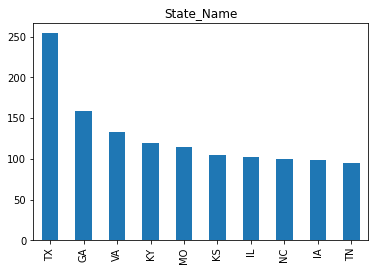

In [8]:
plt.title('State_Name')
Feeding_America['State_Name'].value_counts().nlargest(10).plot.bar()

<AxesSubplot:ylabel='State_Name'>

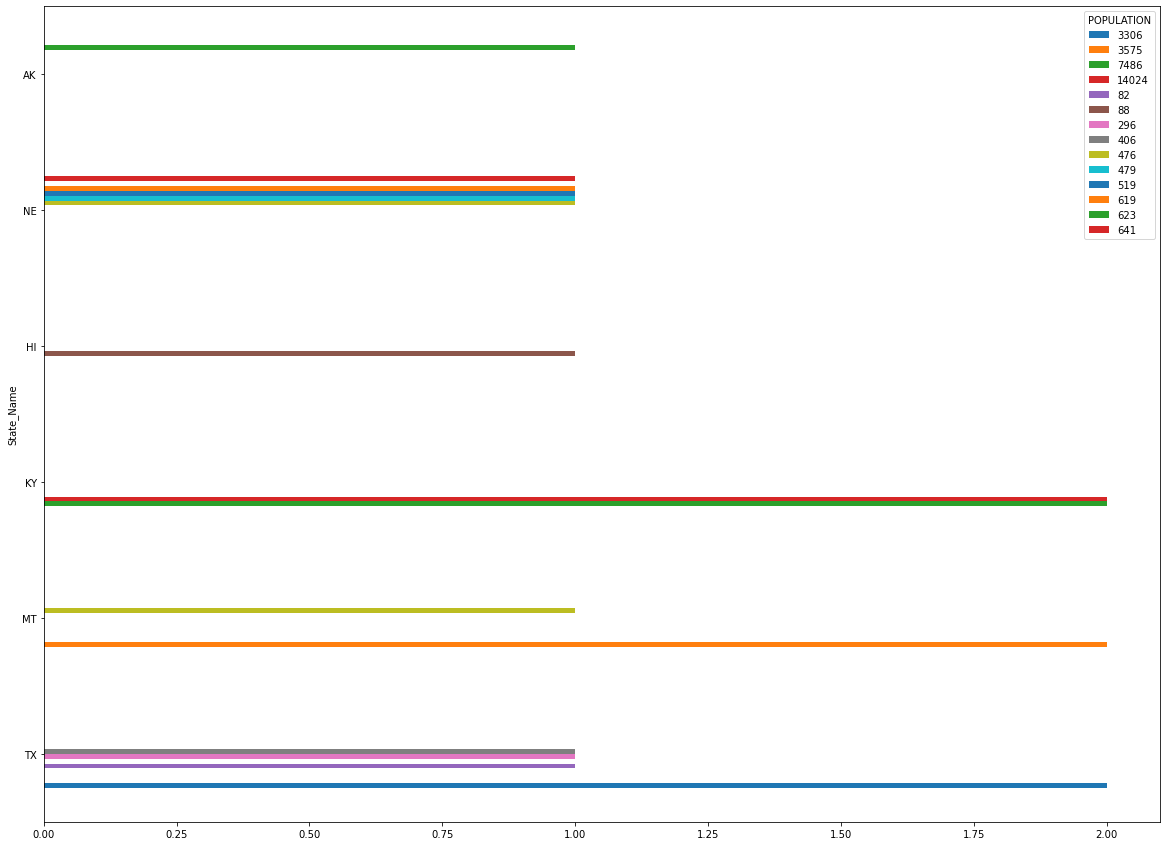

In [9]:
Feeding_America.groupby('POPULATION').State_Name.value_counts().nlargest(15).unstack(0).plot.barh(figsize = (20,15))

# Groupby
### The pandas groupby function is useful when comparing segments of a given column.

In [10]:
round(Feeding_America.groupby(['Cost_Per_Meal_2018','State_Name']).mean(),1)

,,OBJECTID_1,FIPS,STATE_FIPS,CNTY_FIPS,POPULATION,Food_Insecurity_Rate_2018,Food_Insecure_Persons_2018,Low_Threshold_in_state,High_Threshold_in_state,Pct__FI_≤_Low_Threshold,Pct__FI_Btwn_Thresholds,Pct__FI___High_Threshold,ChildFoodInsecurityRate_2018,Food_Insecure_Children_2018,FoodInsecureChildrenHH_1_2018,FoodInsecureChildrenHH_2_2018,W_AnnFoodBudgetShortfall_2018,Shape__Area,Shape__Length
Cost_Per_Meal_2018,State_Name,,,,,,,,,,,,,,,,,,,
2.14,TX,2673.0,48299.0,48.0,299.0,22377.0,0.2,3420.0,1.6,1.8,0.6,0.1,0.3,0.3,780.0,0.7,0.3,1236000.0,2.504015e+09,235381.4
2.17,TX,2768.0,48489.0,48.0,489.0,19806.0,0.2,4560.0,1.6,1.8,0.9,0.1,0.0,0.3,1800.0,1.0,0.0,1672000.0,1.563642e+09,543756.1
2.29,TX,2755.0,48463.0,48.0,463.0,28102.0,0.1,3700.0,1.6,1.8,1.0,0.0,0.0,0.2,1530.0,1.0,0.0,1434000.0,4.033720e+09,254702.3
2.33,TX,2707.5,48368.0,48.0,368.0,26836.5,0.2,3935.0,1.6,1.8,0.9,0.1,0.1,0.2,1585.0,1.0,0.0,1549500.0,5.953792e+09,353566.3
2.34,TX,2554.0,48061.0,48.0,61.0,437967.0,0.2,75130.0,1.6,1.8,0.9,0.1,0.0,0.3,35840.0,1.0,0.0,29787000.0,2.457829e+09,789863.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4.91,ID,558.0,16013.0,16.0,13.0,22157.0,0.1,2060.0,1.3,1.8,0.5,0.2,0.3,0.1,630.0,1.0,0.0,1712000.0,6.889134e+09,667110.2
5.28,WA,2973.0,53039.0,53.0,39.0,21889.0,0.1,2970.0,2.0,2.0,0.9,NaN,0.1,0.2,860.0,0.9,0.1,2656000.0,4.934104e+09,352235.4
6.19,NY,1859.0,36061.0,36.0,61.0,1660472.0,0.1,198450.0,2.0,2.0,0.7,NaN,0.3,0.1,34450.0,0.9,0.1,207953000.0,5.844138e+07,87292.6


In [11]:
States_VLFS = pd.read_excel("C:/Users/Ivette/OneDrive/New folder/DSO 110 Final Project/States Projections - 2020-March 2021.xlsx")

In [12]:
States_VLFS.head(10)

,State,Total Population,2019 VLFS %,2019 VLFS #,[Revised Projections – March 2021]\n2020 VLFS %,[Revised Projections – March 2021]\n2020 VLFS #,[Revised Projections – March 2021]\n2020 VLFS % Change,[Revised Projections – March 2021]\n2020 VLFS # Change,[Revised Projections – March 2021]\nAdjusted Annual Unemployment Change,Total Child Population,2019 Child VLFS %,2019 Child VLFS #,[Revised Projections – March 2021]\n2020 Child VLFS %,[Revised Projections – March 2021]\n2020 Child VLFS #,[Revised Projections – March 2021]\n2020 Child VLFS % Change,[Revised Projections – March 2021]\n2020 Child VLFS # Change
0,AK,731545,0.047,34050,0.057,41470,22,7420,2.7,179749,0.048,8640,0.061,10990,27,2350
1,AL,4903185,0.065,316980,0.071,350320,11,33340,1.4,1085597,0.060,64780,0.068,73870,14,9070
2,AR,3017804,0.066,199930,0.075,225070,13,25140,2.0,699012,0.060,42060,0.070,49170,17,7100
3,AZ,7278717,0.051,369220,0.061,441220,20,72010,2.6,1639648,0.054,88750,0.066,108560,22,19840
4,CA,39512223,0.036,1409330,0.052,2059990,46,650680,5.3,8891064,0.033,291120,0.053,474050,63,182930
5,CO,5758736,0.043,248970,0.055,315090,27,66130,3.3,1256320,0.034,42600,0.048,60530,42,17920
6,CT,3565287,0.051,181950,0.059,210930,16,28990,1.9,727432,0.049,35620,0.059,42990,21,7360
7,DC,705749,0.035,24590,0.042,29870,21,5280,1.6,127901,0.040,5080,0.049,6260,23,1180
8,DE,973764,0.040,39440,0.054,52490,33,13050,4.0,203946,0.042,8640,0.059,12080,40,3440
9,FL,21477737,0.048,1023340,0.059,1272050,24,248720,3.3,4231955,0.056,235560,0.070,297650,26,62050


In [13]:
Feeding_America.drop(["OBJECTID_1", "FIPS", "STATE_FIPS", "CNTY_FIPS", "NAME", "STATE_NAME"], inplace = True, axis = 1)

In [14]:
Feeding_America.head()

,POPULATION,State_Name,County__State,Food_Insecurity_Rate_2018,Food_Insecure_Persons_2018,Low_Threshold_in_state,Low_Threshold_Type,High_Threshold_in_state,High_Threshold_Type,Pct__FI_≤_Low_Threshold,Pct__FI_Btwn_Thresholds,Pct__FI___High_Threshold,ChildFoodInsecurityRate_2018,Food_Insecure_Children_2018,FoodInsecureChildrenHH_1_2018,FoodInsecureChildrenHH_2_2018,Cost_Per_Meal_2018,W_AnnFoodBudgetShortfall_2018,Shape__Area,Shape__Length
0,56903,AL,"Autauga County, Alabama",0.156,8620.0,1.3,SNAP,1.85,Other Nutrition Program,0.462,0.132,0.405,0.214,2870.0,0.81,0.19,3.33,4857000.0,1.565568e+09,213533.7678
1,214651,AL,"Baldwin County, Alabama",0.129,26860.0,1.3,SNAP,1.85,Other Nutrition Program,0.371,0.187,0.442,0.169,7710.0,0.84,0.16,3.58,16274000.0,4.248941e+09,635766.4299
2,26585,AL,"Barbour County, Alabama",0.219,5650.0,1.3,SNAP,1.85,Other Nutrition Program,0.651,0.108,0.241,0.320,1740.0,0.94,0.06,3.12,2988000.0,2.342322e+09,257811.1072
3,23003,AL,"Bibb County, Alabama",0.151,3400.0,1.3,SNAP,1.85,Other Nutrition Program,0.469,0.212,0.319,0.209,970.0,1.00,0.00,2.94,1690000.0,1.621299e+09,191315.8862
4,57971,AL,"Blount County, Alabama",0.136,7810.0,1.3,SNAP,1.85,Other Nutrition Program,0.429,0.279,0.292,0.191,2580.0,1.00,0.00,3.14,4149000.0,1.684210e+09,238847.4590


In [15]:
# Food Insecurity Levels for 2018
Feeding_America['Food insecurity_levels'] = Feeding_America['Food_Insecurity_Rate_2018'] - (Feeding_America['Food_Insecure_Persons_2018'] + Feeding_America['Low_Threshold_in_state'])
Feeding_America.tail()

,POPULATION,State_Name,County__State,Food_Insecurity_Rate_2018,Food_Insecure_Persons_2018,Low_Threshold_in_state,Low_Threshold_Type,High_Threshold_in_state,High_Threshold_Type,Pct__FI_≤_Low_Threshold,...,Pct__FI___High_Threshold,ChildFoodInsecurityRate_2018,Food_Insecure_Children_2018,FoodInsecureChildrenHH_1_2018,FoodInsecureChildrenHH_2_2018,Cost_Per_Meal_2018,W_AnnFoodBudgetShortfall_2018,Shape__Area,Shape__Length,Food insecurity_levels
3215,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.202285e+08,55709.15156,NaN
3216,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.325315e+08,123574.37980,NaN
3217,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.578354e+07,44783.83869,NaN
3218,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.429288e+08,73480.61927,NaN
3219,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.783568e+08,73628.37553,NaN


In [16]:
statewise = pd.pivot_table(Feeding_America, values = ["Food_Insecurity_Rate_2018", "Food_Insecure_Persons_2018", "Low_Threshold_in_state"], index = "State_Name", aggfunc = max)

In [17]:
statewise["Cost_Per_Meal_2018"] = statewise["Food_Insecure_Persons_2018"]*100/statewise["Low_Threshold_in_state"]

In [18]:
statewise["POPULATION"] = statewise["Food_Insecurity_Rate_2018"]*100/statewise["Low_Threshold_in_state"]

In [21]:
statewise = statewise.sort_values(by = "State_Name", ascending = False)

In [22]:
statewise.style.background_gradient(cmap = "cubehelix")

,Food_Insecure_Persons_2018,Food_Insecurity_Rate_2018,Low_Threshold_in_state,Cost_Per_Meal_2018,POPULATION
State_Name,,,,,
WY,11440.000000,0.143000,1.300000,880000.000000,11.000000
WV,24550.000000,0.225000,2.000000,1227500.000000,11.250000
WI,119940.000000,0.175000,2.000000,5997000.000000,8.750000
WA,204850.000000,0.195000,2.000000,10242500.000000,9.750000
VT,15720.000000,0.130000,1.850000,849729.729730,7.027027
VA,61710.000000,0.200000,1.300000,4746923.076923,15.384615
UT,122660.000000,0.192000,1.300000,9435384.615385,14.769231
TX,682650.000000,0.225000,1.650000,41372727.272727,13.636364
TN,140940.000000,0.199000,1.300000,10841538.461538,15.307692


In [29]:
#Top 10 states with highest Food Insecurity
top_10_highest_Food_Insecurity = Feeding_America.groupby(by = 'State_Name').max()[['Food_Insecurity_Rate_2018', 'Cost_Per_Meal_2018']].sort_values(by = ['State_Name'], ascending = False).reset_index()

In [30]:
fig = plt.figure(figsize=(16,9))

<Figure size 1152x648 with 0 Axes>

Text(0.5, 1.0, 'Top 10 States with the Highest Food Insecurity')

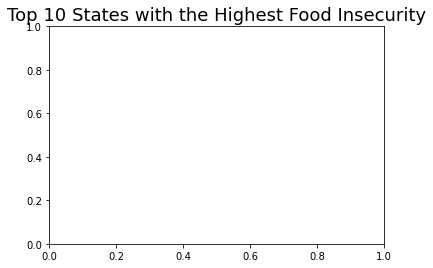

In [31]:
plt.title("Top 10 States with the Highest Food Insecurity", size = 18)

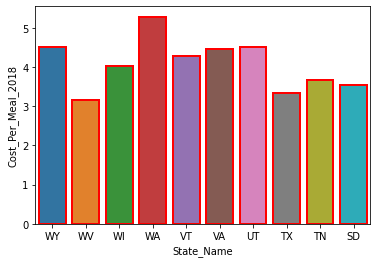

In [32]:
ax = sns.barplot(data = top_10_highest_Food_Insecurity.iloc[:10], y = "Cost_Per_Meal_2018", x = "State_Name", linewidth = 2, edgecolor = 'red')

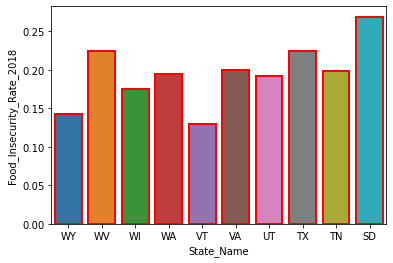

In [33]:
ax = sns.barplot(data = top_10_highest_Food_Insecurity.iloc[:10], y = "Food_Insecurity_Rate_2018", x = "State_Name", linewidth = 2, edgecolor = 'red')